# 2019 SAIPE Program Estimates Data Study												
Poverty Rate, All Ages - Counties in the United States											

This report provides a summary of the 2019 release of the U.S. Census Bureau's Small Area Income and Poverty Estimates (SAIPE) program. SAIPE is the only source for single-year estimates of income and poverty for all counties in the United States. SAIPE also releases estimates of childhood poverty for all school districts. This report describes income and poverty trends at the state, county, and school district levels.

Source:  Small Area Income and Poverty Estimates (SAIPE) program, U.S. Census Bureau									

In [1]:
import pandas as pd 
import sqlite3
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

Matplotlib is building the font cache; this may take a moment.


In [8]:
#Importing the 30 Lowest SAIPE County Estimates dataset.
df = pd.read_csv("2019 SAIPE Program Estimates Data ")

In [9]:
df

,County Name,Population,Poverty Rate and Ages,90% C.I. Lower Bound,90% C.I. Upper Bound
0,Douglas Count - CO,351154,2.2,1.5,2.9
1,Loudoun County - VA,413538,2.8,1.8,3.8
2,Falls Church city - VA,14617,2.8,1.8,3.8
3,Los Alamos County - NM,19369,2.8,1.7,3.9
4,Carver County - MN,105089,3.2,2.2,4.2
5,Lincoln County - SD,61128,3.2,2.0,4.4
6,Hunterdon County - NJ,124371,3.2,2.0,4.4
7,Monroe County - IL,34637,3.2,2.1,4.3
8,Williamson County - TN,238412,3.3,2.2,4.4
9,Ozaukee County - WI,89221,3.8,2.6,5.0


In [10]:
#Describing the dataset in one go. 
df.describe()

,Population,Poverty Rate and Ages,90% C.I. Lower Bound,90% C.I. Upper Bound
count,30.000000,30.000000,30.00000,30.000000
mean,171493.266667,3.943333,2.63000,5.256667
std,123767.268599,0.731406,0.55283,0.959052
min,12124.000000,2.200000,1.50000,2.900000
25%,75154.000000,3.225000,2.20000,4.400000
50%,137205.500000,4.100000,2.70000,5.500000
75%,242792.000000,4.600000,3.10000,6.000000
max,413538.000000,4.800000,3.60000,6.700000


Maximum poverty rate as per the ages is 4.800000. The largest population is 413538.00000

In [13]:
df.columns

Index(['County Name', ' Population', ' Poverty Rate and Ages',
       ' 90% C.I. Lower Bound', ' 90% C.I. Upper Bound'],
      dtype='object')

In [16]:
## Sorting the data in ascending order. 
data = df.groupby('County Name')[' Population', ' Poverty Rate and Ages',  ' 90% C.I. Lower Bound', ' 90% C.I. Upper Bound'].sum().reset_index()
data = data.sort_values(' Poverty Rate and Ages', ascending = True)
data = data[['County Name', ' Population', ' Poverty Rate and Ages',   ' 90% C.I. Lower Bound', ' 90% C.I. Upper Bound']]
data = data.reset_index(drop = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_996\4156167262.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby('County Name')[' Population', ' Poverty Rate and Ages',  ' 90% C.I. Lower Bound', ' 90% C.I. Upper Bound'].sum().reset_index()


In [17]:
data

,County Name,Population,Poverty Rate and Ages,90% C.I. Lower Bound,90% C.I. Upper Bound
0,Douglas Count - CO,351154,2.2,1.5,2.9
1,Los Alamos County - NM,19369,2.8,1.7,3.9
2,Falls Church city - VA,14617,2.8,1.8,3.8
3,Loudoun County - VA,413538,2.8,1.8,3.8
4,Carver County - MN,105089,3.2,2.2,4.2
5,Monroe County - IL,34637,3.2,2.1,4.3
6,Lincoln County - SD,61128,3.2,2.0,4.4
7,Hunterdon County - NJ,124371,3.2,2.0,4.4
8,Williamson County - TN,238412,3.3,2.2,4.4
9,Ozaukee County - WI,89221,3.8,2.6,5.0


 90% C.I. Lower Bound        AxesSubplot(0.125,0.125;0.227941x0.755)
 90% C.I. Upper Bound     AxesSubplot(0.398529,0.125;0.227941x0.755)
 Poverty Rate and Ages    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

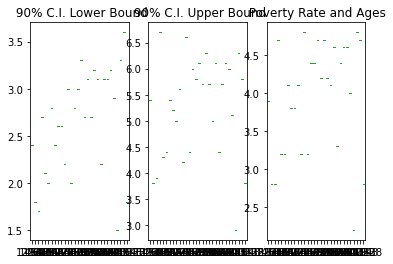

In [21]:
df.plot.box(' Population')

<AxesSubplot:>

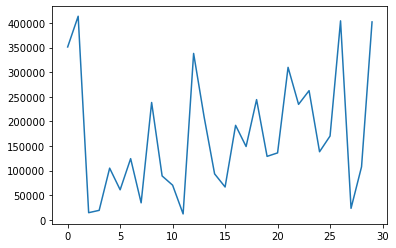

In [22]:
df[' Population'].plot()

In [24]:
inddex = np.where(data[' Population'] == max(data[' Population']))
inddex

(array([3], dtype=int64),)

In [29]:
index = np.where(data[' Population'] == min(data[' Population']))
index

(array([11], dtype=int64),)

In [31]:
data[' Poverty Rate and Ages'][(data[' Population'] == 413538)]

3    2.8
Name:  Poverty Rate and Ages, dtype: float64

In [32]:
 data[' Poverty Rate and Ages'][(data[' Population'] == 12124)]

11    3.9
Name:  Poverty Rate and Ages, dtype: float64

<BarContainer object of 30 artists>

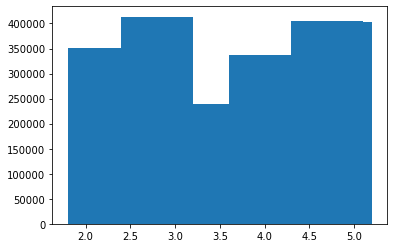

In [35]:
plt.bar(data[' Poverty Rate and Ages'], data[' Population'], align = "center")

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7c24920d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7c2492670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7c2484ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7c2492c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7c2492ee0>],
 'means': []}

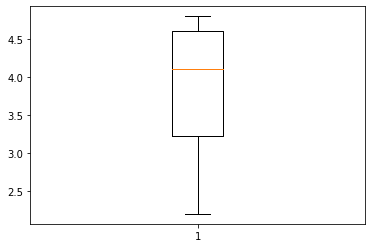

In [36]:
plt.boxplot(data[' Poverty Rate and Ages'])

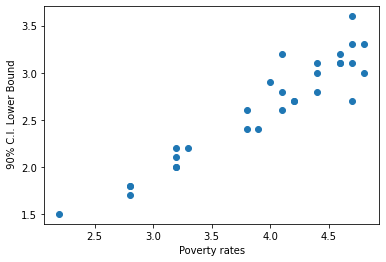

In [38]:
plt.xlabel('Poverty rates')
plt.ylabel(' 90% C.I. Lower Bound')
plt.scatter(data[' Poverty Rate and Ages'],data[' 90% C.I. Lower Bound'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Poverty Rate and Ages', ylabel=' 90% C.I. Upper Bound'>

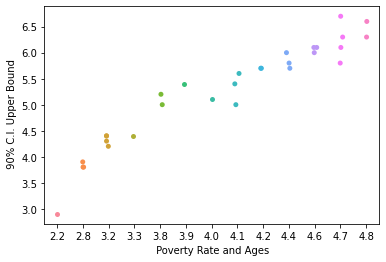

In [41]:
sns.stripplot(data[' Poverty Rate and Ages'],data[' 90% C.I. Upper Bound'])

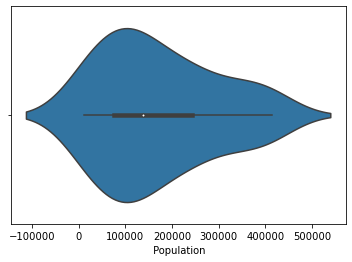

In [42]:
sns.violinplot(x = ' Population', data = data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' Population', ylabel='Density'>

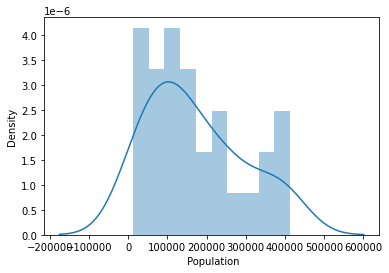

In [43]:
sns.distplot(data[' Population'], bins = 10)

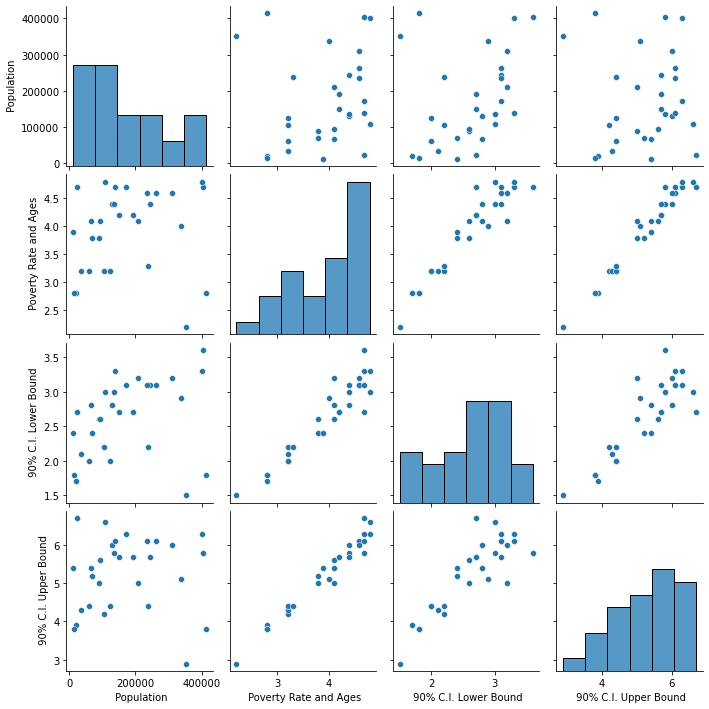

In [44]:
sns.pairplot(data)